## Decision Tree for Iris dataset

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# setting style
from matplotlib import style
style.use('seaborn')

In [2]:
iris = load_iris()
X = iris.data[:, 2:]
y = iris.target

In [3]:
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [4]:
## Commenting this as I have already created dot file
# from sklearn.tree import export_graphviz

# export_graphviz(
#     tree_clf, 
#     out_file="iris_tree.dot",
#     feature_names=iris.feature_names[2:],
#     class_names=iris.target_names,
#     rounded=True,
#     filled=True
# )

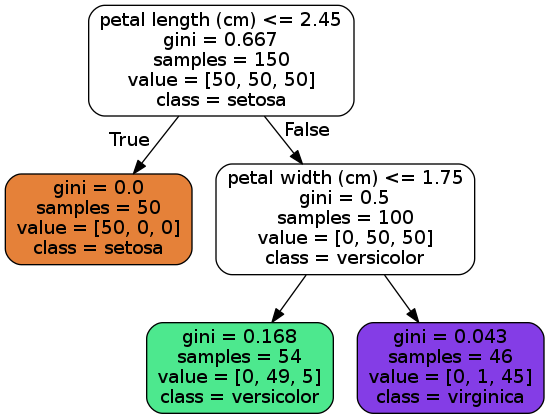

In [5]:
from IPython.display import Image
Image(filename='iris_tree.png') 

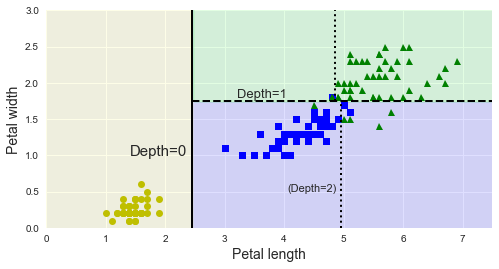

In [6]:
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

plt.show()

In [7]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [8]:
tree_clf.predict([[5, 1.5]])

array([1])

## Decision Tree for Cancer dataset

In [9]:
import pandas as pd

dataset_path = r"dataset\framingham.csv"
df = pd.read_csv(dataset_path)

In [10]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [11]:
df = df.fillna(df.mean())

In [12]:
X = df[["currentSmoker", "cigsPerDay"]]
y = df.iloc[:, -1]

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [14]:
clf_cancer = DecisionTreeClassifier()
clf_cancer.fit(X_train, y_train)

DecisionTreeClassifier()

In [15]:
## Commenting this as I have already created dot file
# from sklearn.tree import export_graphviz

# export_graphviz(
#     clf_cancer, 
#     out_file="cancer_dataset.dot",
#     feature_names=["currentSmoker", "cigsPerDay"],
#     class_names=list(df.columns[-1]),
#     rounded=True,
#     filled=True
# )

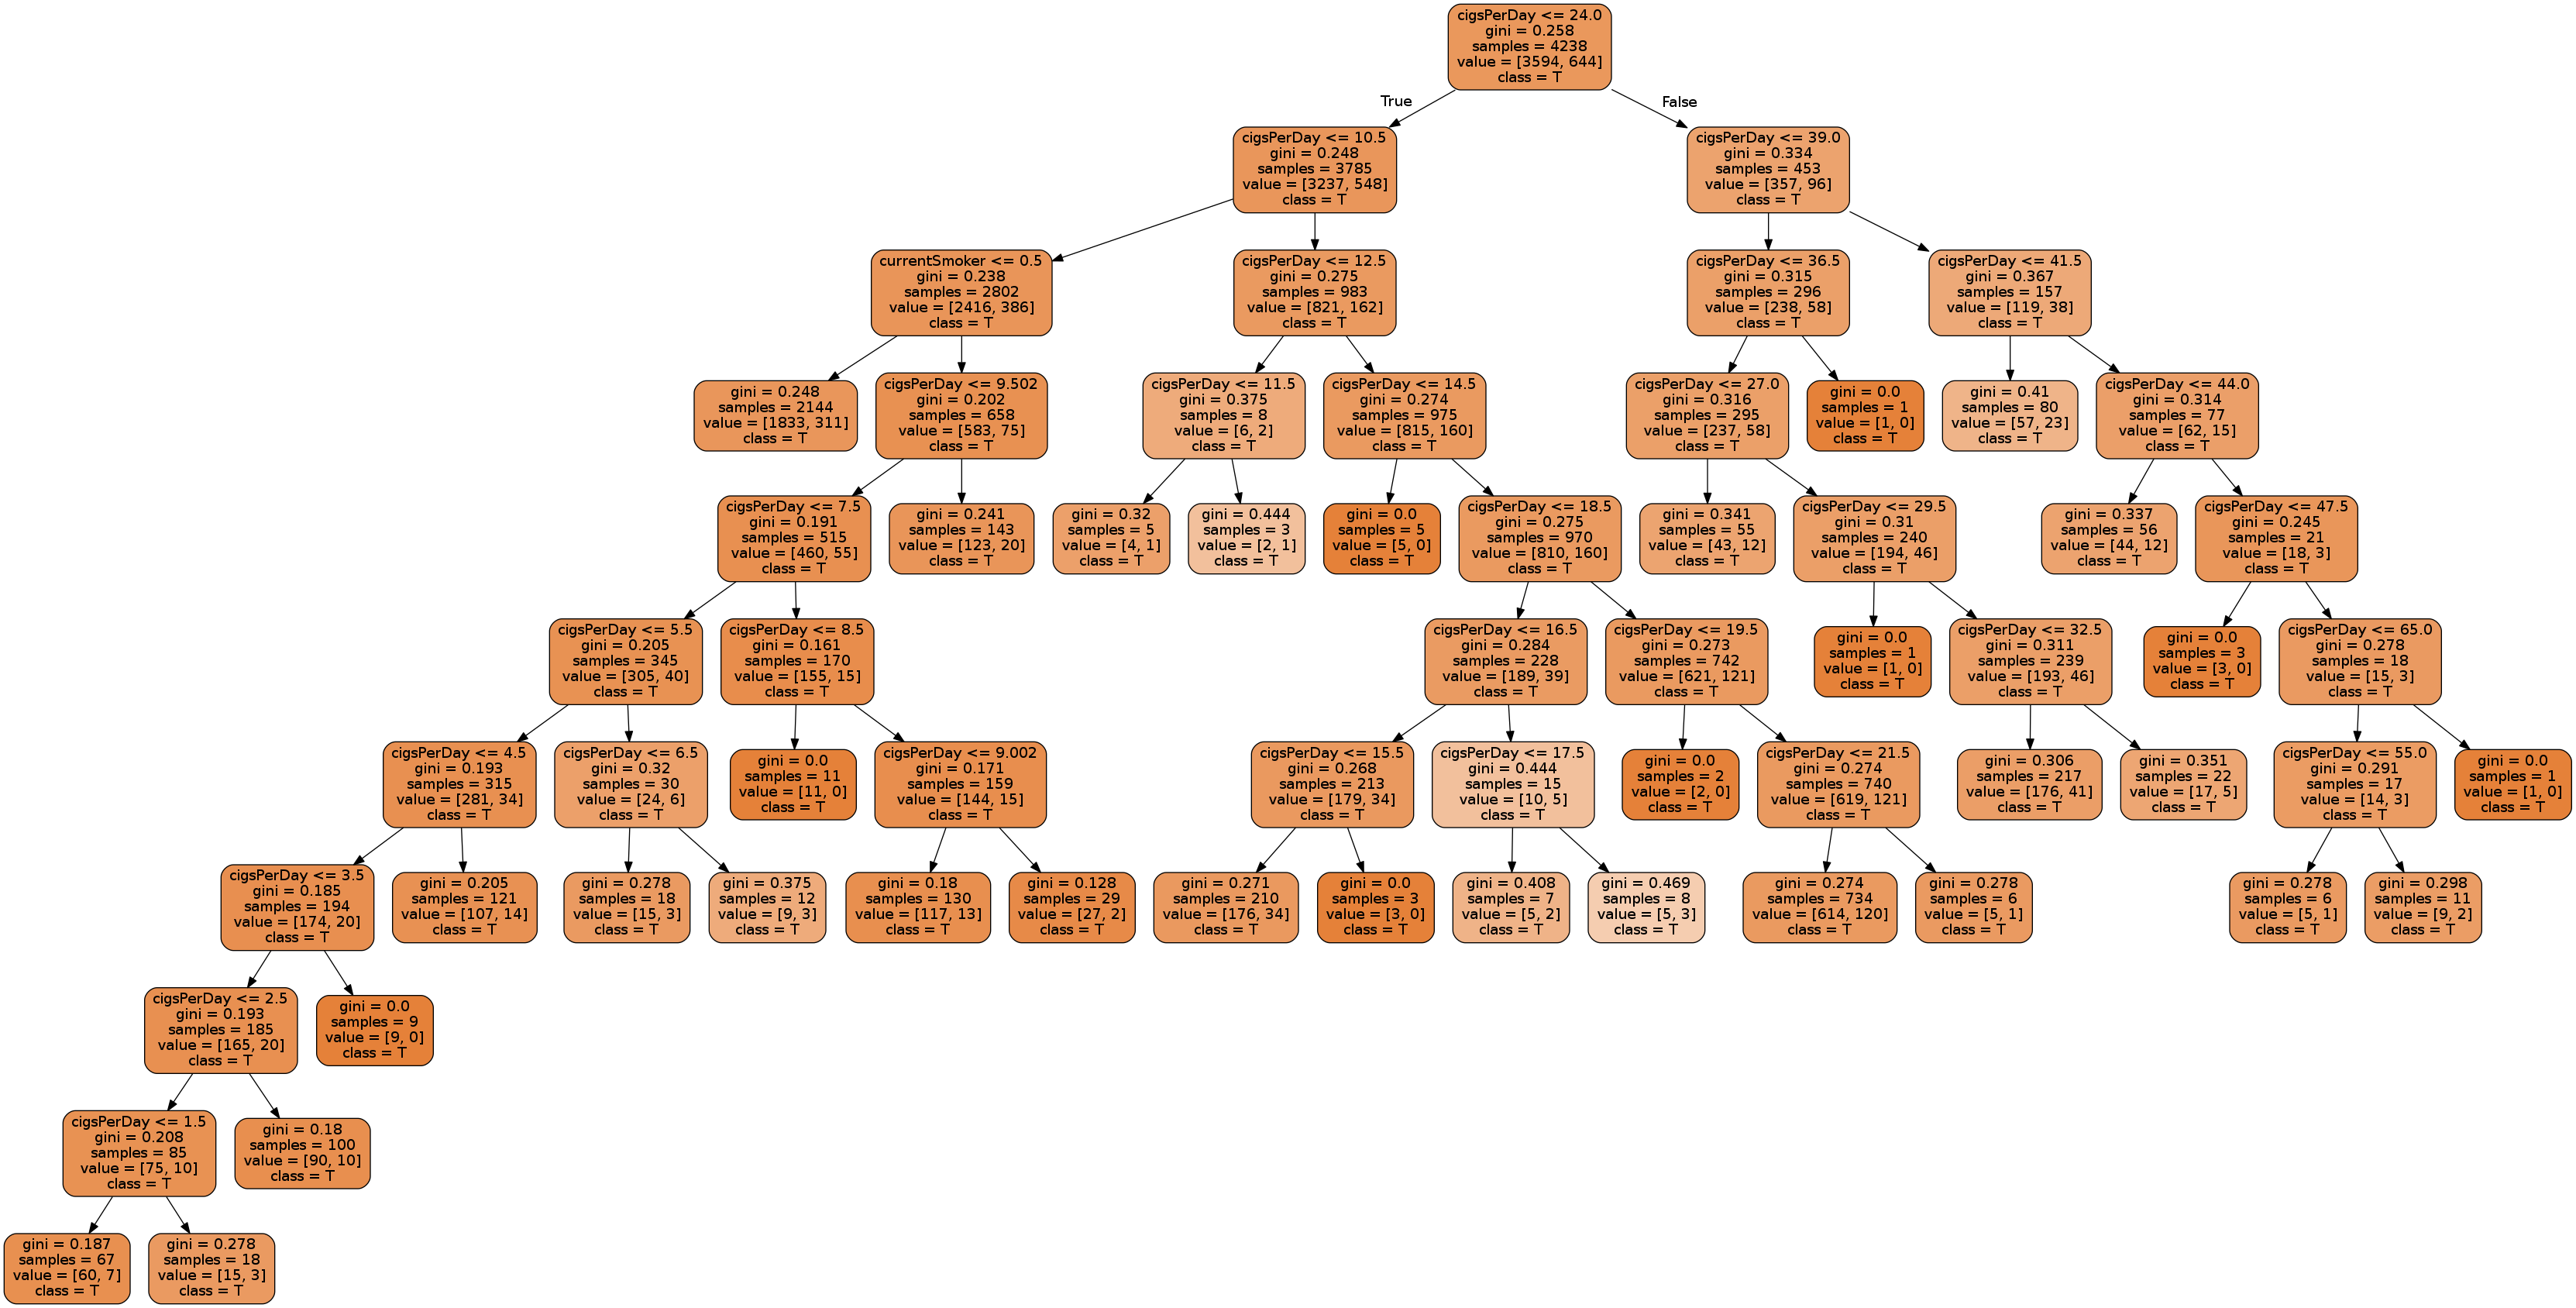

In [16]:
from IPython.display import Image
Image(filename='cancer_dataset.png') 

In [17]:
clf_cancer.score(X_test, y_test)

0.8620283018867925

In [18]:
clf_cancer.classes_

array([0, 1], dtype=int64)

In [19]:
clf_cancer.max_features_

2

In [20]:
clf_cancer.n_classes_

2

In [21]:
clf_cancer.n_features_

2

In [22]:
clf_cancer.n_outputs_

1

In [23]:
clf_cancer.tree_